# Approaches
- Isolation Forest + Uncertainty Sampling + Random Forest
- Isolation Forest + Expected Model Change + Random Forest

In [ ]:
with open('seeds.txt', 'r') as f:
    SEEDS = [int(line.strip()) for line in f.readlines()]
    
print(SEEDS)

# Load Data

In [1]:
import kagglehub
import pandas as pd

main_folder = "elliptic_bitcoin_dataset"
filenames = ["elliptic_txs_classes", "elliptic_txs_edgelist", "elliptic_txs_features"]

# Download
path = kagglehub.dataset_download("ellipticco/elliptic-data-set")

# Read
class_df = pd.read_csv(f"{path}/{main_folder}/{filenames[0]}.csv")
edgelist_df = pd.read_csv(f"{path}/{main_folder}/{filenames[1]}.csv")
features_df = pd.read_csv(f"{path}/{main_folder}/{filenames[2]}.csv", header=None)

# Preview
print("Class Data:")
print(class_df.head())

print("\nEdgelist Data:")
print(edgelist_df.head())

print("\nFeatures Data:")
print(features_df.head())

/Users/yudhistiraonggowarsito/Documents/SMU/Courses/CS610 - Applied Machine Learning/Project/aml_project/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Class Data:
        txId    class
0  230425980  unknown
1    5530458  unknown
2  232022460  unknown
3  232438397        2
4  230460314  unknown

Edgelist Data:
       txId1      txId2
0  230425980    5530458
1  232022460  232438397
2  230460314  230459870
3  230333930  230595899
4  232013274  232029206

Features Data:
         0    1         2         3         4          5         6    \
0  230425980    1 -0.171469 -0.184668 -1.201369  -0.121970 -0.043875   
1    5530458    1 -0.171484 -0.184668 -1.201369  -0.121970 -0.043875   
2  232022460    1 -0.172107 -0.184668 -1.201369  -0.121970 -0.043875   
3  232438397    1  0.163054  1.963790 -0.646376  12.409294 -0.063725   
4  230460314    1  1.011523 -0.081127 -1.201369   1.153668  0.333276   

        7          8         9    ...       157       158       159       160  \
0 -0.113002  -0.061584 -0.162097  ... -0.562153 -0.600999  1.461330  1.461369   
1 -0.113002  -0.061584 -0.162112  ...  0.947382  0.673103 -0.979074 -0.978556   
2 -0

In [193]:
display(class_df.describe())

display(edgelist_df.describe())

display(features_df.describe())

,txId
count,2.037690e+05
mean,1.711310e+08
std,1.104655e+08
min,1.076000e+03
25%,8.433452e+07
50%,1.624375e+08
75%,2.454798e+08
max,4.032446e+08


,txId1,txId2
count,2.343550e+05,2.343550e+05
mean,1.612218e+08,1.686881e+08
std,1.134457e+08,1.110120e+08
min,1.076000e+03,1.076000e+03
25%,6.933967e+07,7.342958e+07
50%,1.555782e+08,1.575814e+08
75%,2.433861e+08,2.454072e+08
max,4.032446e+08,4.032446e+08


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166
count,2.037690e+05,203769.000000,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,203769.000000,...,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05
mean,1.711310e+08,23.843961,2.231681e-17,1.785345e-17,3.570689e-17,6.890314e-17,7.755091e-17,5.746578e-17,2.566433e-17,2.901185e-17,4.463361e-17,4.658634e-17,1.339008e-17,5.356034e-17,-1.562177e-17,4.881802e-17,9.149891e-17,4.184401e-17,2.008513e-17,-3.124353e-17,4.463361e-17,9.819395e-17,-9.149891e-17,1.841137e-17,3.124353e-17,3.124353e-17,3.124353e-17,8.368803e-17,4.574945e-17,7.866675e-17,-4.463361e-18,3.570689e-17,5.132866e-17,3.459105e-17,1.673761e-17,2.454849e-17,6.695042e-18,4.463361e-18,2.008513e-17,-1.085155e-16,-4.295985e-17,3.570689e-17,2.678017e-17,2.901185e-17,3.570689e-17,1.673761e-17,-8.257219e-17,4.909698e-17,2.231681e-17,0.000000,...,2.147993e-17,6.667146e-17,5.802370e-17,-1.115840e-17,-2.231681e-18,5.356034e-17,2.008513e-17,4.686530e-17,8.285115e-17,4.463361e-17,8.034051e-17,4.463361e-18,-1.394800e-17,-1.869033e-17,3.347521e-17,3.235937e-17,4.017025e-17,5.021282e-18,2.901185e-17,3.793857e-17,4.284827e-16,-5.713103e-16,1.048890e-16,-3.213620e-15,8.926723e-18,9.149891e-17,2.678017e-17,3.570689e-17,-3.570689e-17,-1.785345e-17,8.926723e-17,-8.926723e-18,-2.142414e-16,-1.071207e-16,-2.231681e-16,-7.141378e-16,2.231681e-17,4.463361e-18,8.926723e-18,3.905441e-17,-3.235937e-17,1.595652e-16,-8.480387e-17,6.695042e-17,-4.686530e-17,-2.231681e-18,5.356034e-17,1.339008e-17,3.570689e-17,6.025538e-17
std,1.104655e+08,15.172170,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.

## Data Preprocessing

In [194]:
# Create column names
colnames1 = {'0': 'txId', 1: "time_step"}
colnames2 = {str(ii+2): "local_feature_" + str(ii+1) for ii in range(93)}
colnames3 = {str(ii+95): "aggregate_feature_" + str(ii+1) for ii in range(72)}

colnames = dict(colnames1, **colnames2, **colnames3 )
colnames = {int(jj): item_kk for jj,item_kk in colnames.items()}

features_df.rename(columns=colnames, inplace=True)

display(features_df.head())

# Change unknown class to 3, 2 is licit, 1 is illicit
class_df.loc[class_df['class'] == 'unknown', 'class'] = 3
df = pd.merge(class_df, features_df)

# Split train-test data based on time steps (Weber et al)
df['class'] = df['class'].astype(int)
df['time_step'] = df['time_step'].astype(int)

df.set_index('txId', inplace=True)

display(df.head())
display(df.shape)

,txId,time_step,local_feature_1,local_feature_2,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,...,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,-0.167933,-0.049707,-0.164402,-0.028741,-0.035391,-0.042955,-0.013282,-0.057195,-0.169609,-0.171154,-0.174473,-1.373657,-1.371460,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239368,-0.075256,-0.234952,0.037468,0.043444,-0.227203,-0.243236,-0.097895,...,-0.004358,-0.004194,-0.116425,-0.176617,-0.137323,-0.152464,-0.026060,-0.027660,-0.093145,-0.143707,-0.097719,-0.127462,0.003143,0.002426,-0.120950,-0.199145,-0.187993,-0.212948,1.064205,1.063787,-1.373782,-1.354735,-0.297975,-1.403698,1.342003,1.340733,-0.171601,-0.458162,-0.423588,-0.440883,-1.015963,-1.016230,-0.968903,-0.375715,0.759748,-0.768329,1.488113,1.487932,-0.216814,-0.605631,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,-0.167948,-0.049707,-0.164417,-0.028741,-0.035391,-0.042955,-0.013282,-0.055327,-0.169757,-0.171477,-0.174490,0.887058,0.884557,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239368,-0.075256,-0.234952,0.037468,0.043444,-0.227203,-0.243236,-0.097895,...,-0.004358,-0.004194,-0.116425,-0.176617,-0.137323,-0.152464,-0.026060,-0.027660,-0.093145,-0.143707,-0.097719,-0.127462,0.003143,0.002426,-0.121330,-0.110933,-0.075909,-0.111641,-1.159649,-1.160129,-1.373723,-1.353918,-0.295982,-1.403215,-0.975738,-0.975237,-0.168742,-0.263290,-0.186389,-0.250875,-1.015963,-1.016230,-0.968903,0.146997,1.366287,-0.464773,-1.116918,-1.116948,-0.216814,0.634272,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,-0.168576,-0.049707,-0.165054,-0.028741,-0.035391,-0.042955,-0.01

,class,time_step,local_feature_1,local_feature_2,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,...,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
txId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
230425980,3,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,-0.167933,-0.049707,-0.164402,-0.028741,-0.035391,-0.042955,-0.013282,-0.057195,-0.169609,-0.171154,-0.174473,-1.373657,-1.371460,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239368,-0.075256,-0.234952,0.037468,0.043444,-0.227203,-0.243236,-0.097895,...,-0.004358,-0.004194,-0.116425,-0.176617,-0.137323,-0.152464,-0.026060,-0.027660,-0.093145,-0.143707,-0.097719,-0.127462,0.003143,0.002426,-0.120950,-0.199145,-0.187993,-0.212948,1.064205,1.063787,-1.373782,-1.354735,-0.297975,-1.403698,1.342003,1.340733,-0.171601,-0.458162,-0.423588,-0.440883,-1.015963,-1.016230,-0.968903,-0.375715,0.759748,-0.768329,1.488113,1.487932,-0.216814,-0.605631,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
5530458,3,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,-0.167948,-0.049707,-0.164417,-0.028741,-0.035391,-0.042955,-0.013282,-0.055327,-0.169757,-0.171477,-0.174490,0.887058,0.884557,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239368,-0.075256,-0.234952,0.037468,0.043444,-0.227203,-0.243236,-0.097895,...,-0.004358,-0.004194,-0.116425,-0.176617,-0.137323,-0.152464,-0.026060,-0.027660,-0.093145,-0.143707,-0.097719,-0.127462,0.003143,0.002426,-0.121330,-0.110933,-0.075909,-0.111641,-1.159649,-1.160129,-1.373723,-1.353918,-0.295982,-1.403215,-0.975738,-0.975237,-0.168742,-0.263290,-0.186389,-0.250875,-1.015963,-1.016230,-0.968903,0.146997,1.366287,-0.464773,-1.116918,-1.116948,-0.216814,0.634272,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
232022460,3,1,-0.172107,-0.184668,-1.201369,-0.12197

(203769, 167)

In [195]:
df_labeled = df[df['class'].isin([1, 2])] # only include labeled samples
df_unlabeled = df[df['class'] == 3] # only include unlabeled samples

df['time_step'] = df['time_step'].astype(int)
train_df = df_labeled[df_labeled['time_step'] <= 34].copy()
test_df = df_labeled[df_labeled['time_step'] >= 35].copy()

# Extract features and labels for train/test
feature_cols = [col for col in df.columns if col.startswith("local_") or col.startswith("aggregate_")]

X_train = train_df[feature_cols].values
y_train = train_df['class'].map({1:1, 2:0}).values # map labels: illicit=1, licit=0

X_test = test_df[feature_cols].values
y_test = test_df['class'].map({1:1, 2:0}).values

time_steps_test = test_df['time_step'].values

print(df_labeled.shape)
print(df_unlabeled.shape)
print(X_train.shape)
print(X_test.shape)

X_labeled = df_labeled[feature_cols].values
y_labeled = df_labeled['class']

X_unlabeled = df_unlabeled[feature_cols].values

(46564, 167)
(157205, 167)
(29894, 165)
(16670, 165)


## Isolation Forest + Random Sampling + Random Forest

In [219]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import f1_score
from scipy.stats import entropy

def isolation_forest_sampling(X_train, unlabeled_idx, n_instances, contamination=0.1):
    X_unlabeled = X_train[unlabeled_idx]

    # Fit Isolation Forest
    iso = IsolationForest(contamination=contamination, random_state=RANDOM_SEED)
    preds = iso.fit_predict(X_unlabeled)

    # Keep only inliers
    inlier_mask = preds == 1
    inlier_indices = np.where(inlier_mask)[0]  # Get the indices of inliers

    # Map back to the original indices in `unlabeled_idx`
    inlier_indices = np.array(unlabeled_idx)[inlier_indices].tolist()

    # Randomly sample from inliers
    selected_indices = np.random.choice(inlier_indices, size=min(n_instances, len(inlier_indices)), replace=False)

    return list(selected_indices)

def uncertainty_sampling(probs, n_instances):
    uncertainty = np.abs(probs[:,1] - 0.5)
    query_idx = np.argsort(uncertainty)[:n_instances]
    return query_idx

def expected_model_change_sampling_rf(probs, n_instances):
    # Approximate EMC for RF by using predictive entropy as proxy
    # probs shape (n_samples, n_classes)
    ent = entropy(probs.T)
    query_idx = np.argsort(ent)[-n_instances:]  # highest entropy (most info gain)
    return query_idx

# --- Active Learning loop for the two models ---

def active_learning_loop(X_train, y_train, X_test, y_test, time_steps_test,
                         warmup_size=100, batch_size=50, max_iters=50,
                         hot_learner='uncertainty'):
    np.random.seed(42)

    n_samples = X_train.shape[0]
    unlabeled_idx = np.arange(n_samples)
    labeled_idx = np.array([], dtype=int)

    # Warm-up learner: randomly label warmup_size samples
    warmup_idx = isolation_forest_sampling(X_train, unlabeled_idx, warmup_size)
    labeled_idx = np.concatenate([labeled_idx, warmup_idx])
    unlabeled_idx = np.array([i for i in unlabeled_idx if i not in warmup_idx])

    f1_scores = []

    for it in range(max_iters):
        # Train RF classifier on labeled data
        clf = RandomForestClassifier(random_state=42)
        clf.fit(X_train[labeled_idx], y_train[labeled_idx])

        # Evaluate on test set, F1 for illicit class=1
        y_pred = clf.predict(X_test)
        f1 = f1_score(y_test, y_pred, pos_label=1)
        f1_scores.append(f1)
        print(f"Iteration {it+1}/{max_iters}, Labeled size: {len(labeled_idx)}, F1(illicit) = {f1:.4f}")

        if len(unlabeled_idx) == 0:
            print("No more unlabeled samples.")
            break

        # Hot learner selects samples from unlabeled
        probs = clf.predict_proba(X_train[unlabeled_idx])

        if hot_learner == 'uncertainty':
            query_rel_idx = uncertainty_sampling(probs, batch_size)
        elif hot_learner == 'expected_model_change':
            query_rel_idx = expected_model_change_sampling_rf(probs, batch_size)
        else:
            raise ValueError("hot_learner must be 'uncertainty' or 'expected_model_change'")

        query_idx = unlabeled_idx[query_rel_idx]

        # Add queried samples to labeled set, remove from unlabeled set
        labeled_idx = np.concatenate([labeled_idx, query_idx])
        unlabeled_idx = np.array([i for i in unlabeled_idx if i not in query_idx])

    return f1_scores

Running Model 1: Random warm-up + Uncertainty sampling + RF
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7579
Iteration 2/50, Labeled size: 150, F1(illicit) = 0.5586
Iteration 3/50, Labeled size: 200, F1(illicit) = 0.7368
Iteration 4/50, Labeled size: 250, F1(illicit) = 0.6855
Iteration 5/50, Labeled size: 300, F1(illicit) = 0.7870
Iteration 6/50, Labeled size: 350, F1(illicit) = 0.7898
Iteration 7/50, Labeled size: 400, F1(illicit) = 0.7722
Iteration 8/50, Labeled size: 450, F1(illicit) = 0.7898
Iteration 9/50, Labeled size: 500, F1(illicit) = 0.7913
Iteration 10/50, Labeled size: 550, F1(illicit) = 0.7393
Iteration 11/50, Labeled size: 600, F1(illicit) = 0.8061
Iteration 12/50, Labeled size: 650, F1(illicit) = 0.8063
Iteration 13/50, Labeled size: 700, F1(illicit) = 0.7946
Iteration 14/50, Labeled size: 750, F1(illicit) = 0.8134
Iteration 15/50, Labeled size: 800, F1(illicit) = 0.8077
Iteration 16/50, Labeled size: 850, F1(illicit) = 0.8093
Iteration 17/50, Labeled size: 900, F

In [220]:
print("Running Model 1: Isolation Forest + Uncertainty sampling + RF")
f1_model1 = active_learning_loop(
    X_train, y_train, X_test, y_test, time_steps_test,
    hot_learner='uncertainty'
)

print("\nRunning Model 2: Isolation Forest + Expected Model Change sampling (proxy) + RF")
f1_model2 = active_learning_loop(
    X_train, y_train, X_test, y_test, time_steps_test,
    hot_learner='expected_model_change'
)

Running Model 1: Isolation Forest + Uncertainty sampling + RF
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7579
Iteration 2/50, Labeled size: 150, F1(illicit) = 0.5586
Iteration 3/50, Labeled size: 200, F1(illicit) = 0.7368
Iteration 4/50, Labeled size: 250, F1(illicit) = 0.6855
Iteration 5/50, Labeled size: 300, F1(illicit) = 0.7870
Iteration 6/50, Labeled size: 350, F1(illicit) = 0.7898
Iteration 7/50, Labeled size: 400, F1(illicit) = 0.7722
Iteration 8/50, Labeled size: 450, F1(illicit) = 0.7898
Iteration 9/50, Labeled size: 500, F1(illicit) = 0.7913
Iteration 10/50, Labeled size: 550, F1(illicit) = 0.7393
Iteration 11/50, Labeled size: 600, F1(illicit) = 0.8061
Iteration 12/50, Labeled size: 650, F1(illicit) = 0.8063
Iteration 13/50, Labeled size: 700, F1(illicit) = 0.7946
Iteration 14/50, Labeled size: 750, F1(illicit) = 0.8134
Iteration 15/50, Labeled size: 800, F1(illicit) = 0.8077
Iteration 16/50, Labeled size: 850, F1(illicit) = 0.8093
Iteration 17/50, Labeled size: 900,

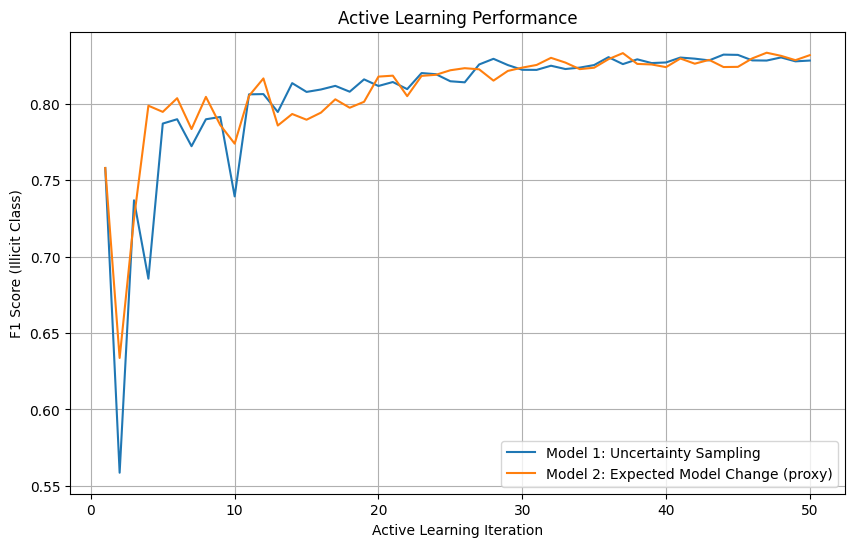

In [221]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1, len(f1_model1)+1), f1_model1, label='Model 1: Uncertainty Sampling')
plt.plot(range(1, len(f1_model2)+1), f1_model2, label='Model 2: Expected Model Change (proxy)')
plt.xlabel('Active Learning Iteration')
plt.ylabel('F1 Score (Illicit Class)')
plt.title('Active Learning Performance')
plt.legend()
plt.grid(True)
plt.show()